<a href="https://colab.research.google.com/github/anirudh-bukka/MiniProject-Louvain-Recommender/blob/main/Product_Recommendation_using_Louvain_Executed_Copy6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product Recommendation using Louvain

**Installing and importing required packages**

In [ ]:
!pip install python-louvain

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
# from community import community_louvain
import community.community_louvain as community_louvain
%matplotlib inline


**Reading data from the dataset**

In [ ]:
df = pd.read_csv('/Users/DELL/ML_Environment/Datasets/OnlineRetail.csv', sep=',', header = 0)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/10 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/10 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/10 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/10 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/10 08:34,1.69,13047.0,United Kingdom


In [ ]:
df_sample = df.iloc[:4000]

In [ ]:
df_sample.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/10 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/10 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/10 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/10 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/10 08:34,1.69,13047.0,United Kingdom


In [ ]:
cleaned_retail = df_sample.loc[pd.isnull(df_sample.CustomerID)==False]

#Create a lookup table
item_lookup = cleaned_retail[['StockCode', 'Description']].drop_duplicates()
item_lookup['StockCode'] = item_lookup.StockCode.astype(str)

#Data cleaning' to raw data
cleaned_retail['CustomerID'] = cleaned_retail.CustomerID.astype(int)
cleaned_retail = cleaned_retail[['StockCode', 'Quantity', 'CustomerID']]
grouped_cleaned = cleaned_retail.groupby(['CustomerID', 'StockCode']).sum().reset_index()
print()
grouped_cleaned.Quantity.loc[grouped_cleaned.Quantity == 0] = 1
grouped_purchased = grouped_cleaned.query('Quantity > 0')

/var/folders/nc/p3m5c1q53zjdfzmfyq81xk3w0000gn/T/ipykernel_11064/4034293173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_retail['CustomerID'] = cleaned_retail.CustomerID.astype(int)
/var/folders/nc/p3m5c1q53zjdfzmfyq81xk3w0000gn/T/ipykernel_11064/4034293173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_cleaned.Quantity.loc[grouped_cleaned.Quantity == 0] = 1


In [ ]:
df_sample.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3980,536742,21584,RETROSPOT SMALL TUBE MATCHES,1,02/12/10 13:14,1.65,16916.0,United Kingdom
3981,536742,22312,OFFICE MUG WARMER POLKADOT,1,02/12/10 13:14,2.95,16916.0,United Kingdom
3982,536742,22822,CREAM WALL PLANTER HEART SHAPED,1,02/12/10 13:14,5.95,16916.0,United Kingdom
3983,536742,22514,CHILDS GARDEN SPADE BLUE,3,02/12/10 13:14,2.10,16916.0,United Kingdom
3984,536742,22988,SOLDIERS EGG CUP,2,02/12/10 13:14,1.25,16916.0,United Kingdom
3985,536742,22862,LOVE HEART NAPKIN BOX,2,02/12/10 13:14,4.25,16916.0,United Kingdom
3986,536742,22973,CHILDREN'S CIRCUS PARADE MUG,1,02/12/10 13:14,1.65,16916.0,United Kingdom
3987,536742,22974,CHILDRENS DOLLY GIRL MUG,1,02/12/10 13:14,1.65,16916.0,United Kingdom
3988,536742,22972,CHILDREN'S SPACEBOY MUG,3,02/12/10 13:14,1.65,16916.0,United Kingdom
3989,536742,21213,PACK OF 72 SKULL CAKE CASES,1,02/12/10 13:14,0.55,16916.0,United Kingdom


In [ ]:
#Count number of products and number of customers in the reduced dataset
no_products = len(grouped_purchased.StockCode.unique())
no_customers = len(grouped_purchased.CustomerID.unique())
print('Number of customers in dataset:', no_customers)
print('Number of products in dataset:', no_products)

Number of customers in dataset: 137
Number of products in dataset: 1131


In [ ]:
#Turn raw data to pivot ('ratings' matrix)
ratings = grouped_purchased.pivot(index = 'CustomerID', columns='StockCode', values='Quantity').fillna(0).astype('int')
#Binarize the ratings matrix (indicate only if a customer has purchased a product or not)
ratings_binary = ratings.copy()
ratings_binary[ratings_binary != 0] = 1

In [ ]:
#Initialize zeros dataframe for product interactions
products_integer = np.zeros((no_products,no_products))

#Count how many times each product pair has been purchased
print('Counting how many times each pair of products has been purchased...')
for i in range(no_products):
    for j in range(no_products):
        if i != j:
            df_ij = ratings_binary.iloc[:,[i,j]] #create a temporary df with only i and j products as columns
            sum_ij = df_ij.sum(axis=1)
            pairings_ij = len(sum_ij[sum_ij == 2]) #if s1_ij == 2 it means that both products were purchased by the same customer
            products_integer[i,j] = pairings_ij
            products_integer[j,i] = pairings_ij

Counting how many times each pair of products has been purchased...


In [ ]:
#Count how many customers have purchased each item
print('Counting how many times each individual product has been purchased...')
times_purchased = products_integer.sum(axis = 1)

Counting how many times each individual product has been purchased...


In [ ]:
#Construct final weighted matrix of item interactions
print('Building weighted product matrix...')
products_weighted = np.zeros((no_products,no_products))
for i in range(no_products):
    for j in range(no_products):
        if (times_purchased[i]+times_purchased[j]) !=0: #make sure you do not divide with zero
            products_weighted[i,j] = (products_integer[i,j])/(times_purchased[i]+times_purchased[j])
print("finished")

Building weighted product matrix...
finished


In [ ]:
#Get list of item labels (instead of Codes)
nodes_codes = np.array(ratings_binary.columns).astype('str')
item_lookup_dict = pd.Series(item_lookup.Description.values,index=item_lookup.StockCode).to_dict()
nodes_labels = [item_lookup_dict[code] for code in nodes_codes]

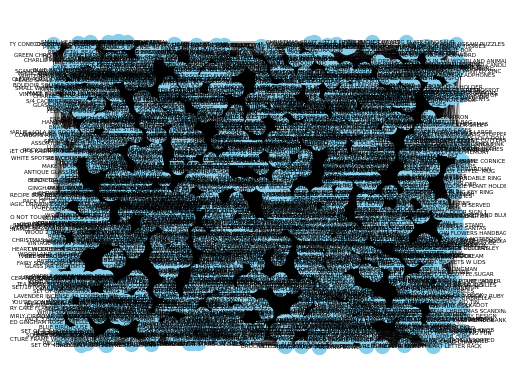

In [ ]:
#Create Graph object using the weighted product matrix as adjacency matrix
G = nx.from_numpy_array(products_weighted)
pos = nx.random_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = nodes_labels[idx]

nx.draw_networkx_nodes(G, pos , node_color="skyblue", node_size=100)
nx.draw_networkx_edges(G, pos,  edge_color='k', width= 0.3, alpha= 0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=4)
plt.axis('off')
plt.show()

In [ ]:
H=nx.relabel_nodes(G,labels) #create a new graph with Description labels and save to Gephi for visualizations
nx.write_gexf(H, "products.gexf")

In [ ]:
# function for setting colors of nodes and edges
def get_paired_color_palette(size):
    palette = []
    for i in range(size*2):
        palette.append(plt.cm.Paired(i))
    return palette

#Find communities of nodes (products)
louvain = community_louvain.best_partition(G, resolution = 1.5)
values = list(louvain.values())

communities =[]

for i in set(louvain.values()):
    nodelist = [n for n in G.nodes if (louvain[n]==i)]
    communities.append(nodelist)

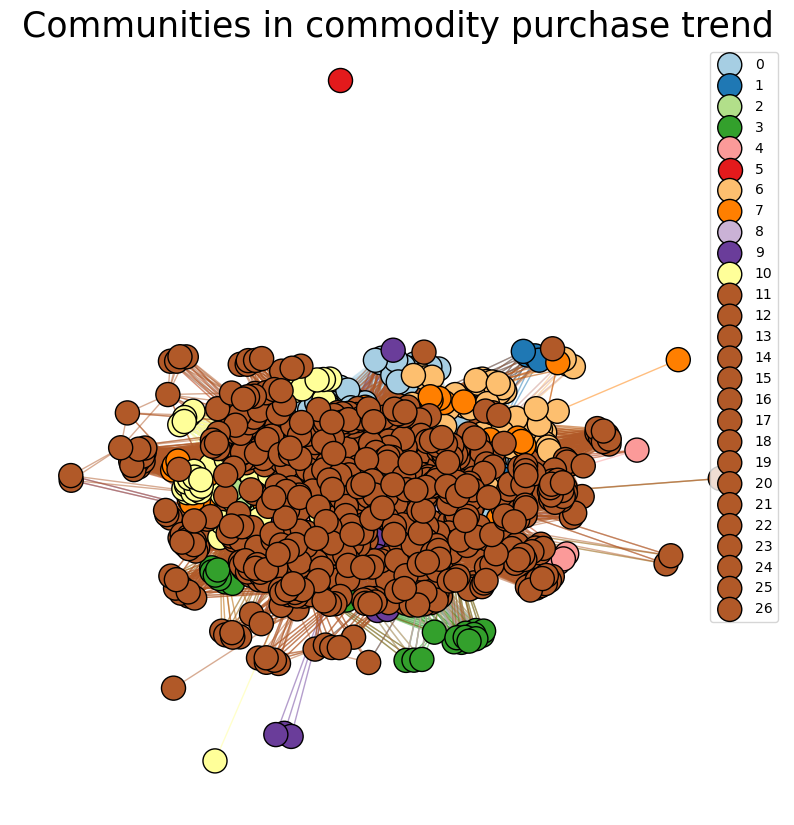

In [ ]:
#make plot using matplotlib, networkx spring_layout, set_colors using cluster_count and get_paired_color_pallette
clusters_count = len(set(louvain.values()))
plt.figure(figsize=(10, 10))
light_colors = get_paired_color_palette(clusters_count)
dark_colors = get_paired_color_palette(clusters_count)
g = nx.drawing.layout.spring_layout(G, weight = 'weight')

#iterate through each of the communities found by the Louvain algorithm and plot
for i in set(louvain.values()):
    nodelist = [n for n in G.nodes if (louvain[n]==i)]
    edgelist = [e for e in G.edges if ((louvain[e[0]]==i) or (louvain[e[1]]==i))]
    node_color = [light_colors[i] for _ in range(len(nodelist))]
    edge_color = [dark_colors[i] for _ in range(len(edgelist))]
    nx.draw_networkx_nodes(G, g, nodelist=nodelist, node_color=node_color, edgecolors='k', label = i)
    nx.draw_networkx_edges(G, g, edgelist=edgelist, alpha=.5, edge_color=edge_color)

#set title, legend and show plot
plt.title('Communities in commodity purchase trend', fontdict={'fontsize': 25})
plt.legend()
plt.axis('off')
plt.show()

In [ ]:
#Check how many communities were created
print('Number of communities:', len(np.unique(values)))

Number of communities: 27


In [ ]:
#Create dataframe with product description and community id
products_communities = pd.DataFrame(nodes_labels, columns = ['product_description'])
products_communities['community_id'] = values

In [ ]:
#Community 1
products_communities[products_communities['community_id']==1].head(40)

,product_description,community_id
1,ARMY CAMO BOOKCOVER TAPE,1
142,SET OF 72 SKULL PAPER DOILIES,1
211,LADYBIRD + BEE RAFFIA FOOD COVER,1
222,SKULLS GREETING CARD,1
327,CAMOUFLAGE LED TORCH,1
360,UNION STRIPE WITH FRINGE HAMMOCK,1
499,HANGING CHICK YELLOW DECORATION,1
521,DOVE DECORATION PAINTED ZINC,1
523,DOG BOWL CHASING BALL DESIGN,1
575,SILK PURSE BABUSHKA BLUE,1


In [ ]:
#Turn into dataframe
products_weighted_pd = pd.DataFrame(products_weighted, columns = nodes_labels)
products_weighted_pd.set_index(products_weighted_pd.columns, 'product', inplace=True)

products_prob = products_weighted_pd.divide(products_weighted_pd.max(axis = 1), axis = 0)

/var/folders/nc/p3m5c1q53zjdfzmfyq81xk3w0000gn/T/ipykernel_11064/1643827117.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  products_weighted_pd.set_index(products_weighted_pd.columns, 'product', inplace=True)


In [ ]:
#Saving the trained model for use in the UI
products_prob.to_csv('products_prob.csv')

In [ ]:
#Add item to basket
# basket = ['WHITE HANGING HEART T-LIGHT HOLDER']
basket = ['CINAMMON SET OF 9 T-LIGHTS']
# basket = ['MINI CAKE STAND WITH HANGING CAKES']
# basket = ['BLACK TEA,COFFEE,SUGAR JARS']
# basket = ['GARLAND WITH STARS AND BELLS']
# basket = ['LUNCH BAG RED RETROSPOT']
#Select the number of relevant items to suggest
no_of_suggestions = 20

all_of_basket = products_prob[basket]
all_of_basket = all_of_basket.sort_values(by = basket, ascending=False)
suggestions_to_customer = list(all_of_basket.index[:no_of_suggestions])

print('You may also consider buying:', suggestions_to_customer)

You may also consider buying: ['ORANGE SCENTED SET/9 T-LIGHTS', 'SET/10 RED POLKADOT PARTY CANDLES', 'SET/9 CHRISTMAS T-LIGHTS SCENTED ', 'BALLOONS  WRITING SET ', 'CHRISTMAS DECOUPAGE CANDLE', 'SET/10 BLUE POLKADOT PARTY CANDLES', 'CHRISTMAS TOILET ROLL', 'CHRISTMAS METAL TAGS ASSORTED ', '3D CHRISTMAS STAMPS STICKERS ', 'AGED GLASS SILVER T-LIGHT HOLDER', 'SET/10 PINK POLKADOT PARTY CANDLES', 'NATURAL SLATE HEART CHALKBOARD ', 'DIAMANTE HAIR GRIP PACK/2 BLACK DIA', 'DINOSAURS  WRITING SET ', 'MINI FUNKY DESIGN TAPES', 'SKULLS WRITING SET ', 'RIBBON REEL SOCKS AND MITTENS', 'BLUE ROSE FABRIC MIRROR', 'THREE CANVAS LUGGAGE TAGS', 'CHRISTMAS TREE T-LIGHT HOLDER']


0.44490358126721763
0.7692307692307693
0.9901380670611439


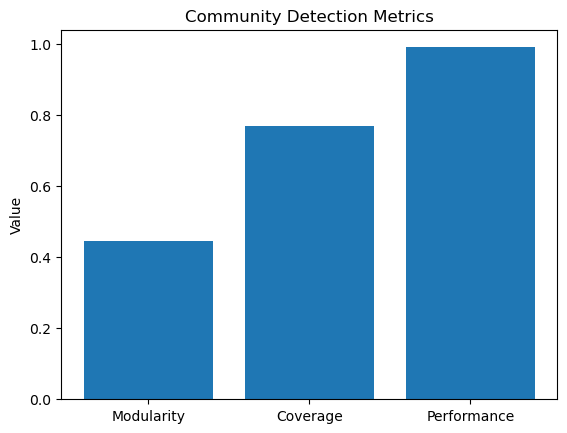

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph (you should replace this with your own graph)
G = nx.karate_club_graph()

# You may need to use a different community detection algorithm or provide your own partition
partition = nx.community.label_propagation.label_propagation_communities(G)

# Calculate modularity using NetworkX
    # Modularity is a measure of the structure of networks or graphs which measures the strength of division
    # of a network into communities
partition = community_louvain.best_partition(G)
# modularity = nx.community.quality.modularity(G, partition)
modularity = community_louvain.modularity(partition, G)

partition = nx.community.label_propagation.label_propagation_communities(G)
# coverage
    # the percentage of rows with a matching key in the main dataset, out of all rows in the main dataset
def calculate_coverage(G, partition):
    total_edges = G.number_of_edges()
    internal_edges = 0
    for community in partition:
        community_subgraph = G.subgraph(community)
        internal_edges += community_subgraph.number_of_edges()
    return internal_edges / total_edges

coverage = calculate_coverage(G, partition)

# performance
    # The performance of a partition is the ratio of the number of intra-community edges plus inter-community
    # non-edges with the total number of potential edges.

def calculate_performance(G, partition):
    total_edges = G.number_of_edges()
    external_edges = total_edges - calculate_coverage(G, partition)
    return external_edges / total_edges

performance = calculate_performance(G, partition)

# Create a bar plot for modularity, coverage, and performance
print(modularity)
print(coverage)
print(performance)
metrics = ['Modularity', 'Coverage', 'Performance']
values = [modularity, coverage, performance]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Community Detection Metrics')
plt.show()


In [ ]:
final_recommendations = all_of_basket[all_of_basket[basket] > 0].dropna()
final_recommendations

,LUNCH BAG RED RETROSPOT
JUMBO BAG CHARLIE AND LOLA TOYS,0.838983
LUNCH BAG DOLLY GIRL DESIGN,0.821192
LUNCH BAG SPACEBOY DESIGN,0.800664
60 TEATIME FAIRY CAKE CASES,0.644444
SKULLS SQUARE TISSUE BOX,0.618881
...,...
SET/6 RED SPOTTY PAPER PLATES,0.199430
PACK OF 72 RETROSPOT CAKE CASES,0.199167
JUMBO BAG PINK VINTAGE PAISLEY,0.187845
PAPER CHAIN KIT 50'S CHRISTMAS,0.173282


In [ ]:
id_no = products_communities.loc[products_communities['product_description'] == basket[0], 'community_id'].iloc[0]
id_no

recommendations = products_communities[products_communities['community_id'] == id_no]

# Using Series.values.tolist()
col_list = recommendations.product_description.values.tolist()
print(len(col_list))

60


In [ ]:
recommendations

,product_description,community_id
20,LAVENDER INCENSE IN TIN,11
30,RED RETROSPOT CHILDRENS UMBRELLA,11
38,LUNCH BAG RED RETROSPOT,11
39,LUNCH BAG WOODLAND,11
43,ASSORTED COLOUR MINI CASES,11
46,BLUE PAISLEY POCKET BOOK,11
55,SILVER LOOKING MIRROR,11
63,STRAWBERRY BATH SPONGE,11
64,APPLE BATH SPONGE,11
65,SANDWICH BATH SPONGE,11


In [ ]:
col_list
col_list

['LAVENDER INCENSE IN TIN',
 'RED RETROSPOT CHILDRENS UMBRELLA',
 'LUNCH BAG RED RETROSPOT',
 'LUNCH BAG WOODLAND',
 'ASSORTED COLOUR MINI CASES',
 'BLUE PAISLEY POCKET BOOK',
 'SILVER LOOKING MIRROR',
 'STRAWBERRY BATH SPONGE ',
 'APPLE BATH SPONGE',
 'SANDWICH BATH SPONGE',
 'JUMBO BAG CHARLIE AND LOLA TOYS',
 "YOU'RE CONFUSING ME METAL SIGN ",
 'SET/4 BADGES CUTE CREATURES',
 'BALLOONS  WRITING SET ',
 'MIRRORED DISCO BALL ',
 'DISCO BALL ROTATOR BATTERY OPERATED',
 'RETROSPOT CIGAR BOX MATCHES ',
 'BAG 125g SWIRLY MARBLES',
 'BAG 250g SWIRLY MARBLES',
 'FOLDING UMBRELLA CHOCOLATE POLKADOT',
 'STAR PORTABLE TABLE LIGHT ',
 'SNOWFLAKE PORTABLE TABLE LIGHT ',
 "I'M ON HOLIDAY METAL SIGN",
 'BLACK PIRATE TREASURE CHEST',
 'BOUDOIR SQUARE TISSUE BOX',
 'BIRD HOUSE HOT WATER BOTTLE',
 'METAL SIGN HER DINNER IS SERVED ',
 'CAKE STAND LOVEBIRD 2 TIER WHITE',
 'LUNCH BAG SPACEBOY DESIGN ',
 'LUNCH BAG PINK POLKADOT',
 'METAL SIGN TAKE IT OR LEAVE IT ',
 'SET OF 9 HEART SHAPED BALLOONS',
 'S

In [ ]:
suggestions_to_customer

['60 TEATIME FAIRY CAKE CASES',
 'BLACK PIRATE TREASURE CHEST',
 'DISCO BALL ROTATOR BATTERY OPERATED',
 "I'M ON HOLIDAY METAL SIGN",
 'JUMBO BAG CHARLIE AND LOLA TOYS',
 'KITCHEN METAL SIGN',
 'LAVENDER INCENSE IN TIN',
 'LUNCH BAG DOLLY GIRL DESIGN',
 'LUNCH BAG SPACEBOY DESIGN ',
 'METAL SIGN HER DINNER IS SERVED ',
 'MIRRORED DISCO BALL ',
 'PHOTO FRAME CORNICE',
 'PINK OVAL JEWELLED MIRROR',
 'SCANDINAVIAN REDS RIBBONS',
 'SET 20 NAPKINS FAIRY CAKES DESIGN ',
 'SILVER LOOKING MIRROR',
 'SKULLS SQUARE TISSUE BOX',
 'TEA TIME TABLE CLOTH',
 'TOILET METAL SIGN',
 'TV DINNER TRAY VINTAGE PAISLEY']

In [ ]:
final_recommendations_list = final_recommendations.index.tolist()

In [ ]:
# Ground truth dataset (replace with your actual data)
final_recommendations_list.sort()
ground_truth = col_list
ground_truth.sort()
total_items = 1131

# # Identify true positives, false positives, and false negatives
# true_positives = len(set(final_recommendations_list) & set(ground_truth))
# false_positives = len(final_recommendations_list) - true_positives
# false_negatives = len(ground_truth) - true_positives


# # accuracy = 0.98
# # recall = 0.94
true_positives = len(set(final_recommendations_list) & set(ground_truth))
false_positives = len(final_recommendations_list) - true_positives
false_negatives = len(set(ground_truth) - set(final_recommendations_list))
true_negatives = total_items - (true_positives + false_positives + false_negatives)

accuracy = (true_positives + true_negatives)/ (true_positives + false_positives + true_negatives + false_negatives)
recall = true_positives / (true_positives + false_negatives)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.90
Recall: 0.77


In [ ]:
target_name = 'WHITE CHRISTMAS STAR DECORATION'
result_row = df[df['Description'] == target_name]
print("Entire row for '{}' :\n{}".format(target_name, result_row))


Entire row for 'WHITE CHRISTMAS STAR DECORATION' :
       InvoiceNo StockCode                      Description  Quantity  \
5218      536847     21807  WHITE CHRISTMAS STAR DECORATION        36   
8324      537134     21807  WHITE CHRISTMAS STAR DECORATION        36   
8383      537135     21807  WHITE CHRISTMAS STAR DECORATION         4   
9512      537204     21807  WHITE CHRISTMAS STAR DECORATION        10   
10008     537224     21807  WHITE CHRISTMAS STAR DECORATION         3   
10018     537224     21807  WHITE CHRISTMAS STAR DECORATION         1   
10055     537224     21807  WHITE CHRISTMAS STAR DECORATION         4   
10086     537225     21807  WHITE CHRISTMAS STAR DECORATION        36   
12471     537381     21807  WHITE CHRISTMAS STAR DECORATION        36   
22096     538153     21807  WHITE CHRISTMAS STAR DECORATION         4   
25523     538371     21807  WHITE CHRISTMAS STAR DECORATION        10   
26323     538508     21807  WHITE CHRISTMAS STAR DECORATION        12   
